# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
import json

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key
#
# # Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/Users/siyuanliang/BootCamp_University/Python-api-challenge/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [46]:
cities
# set a empty list
List = [[],[],[],[],[],[],[],[],[],[]]
i = 1
for city in cities[]:

    url = ("https://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid="+ weather_api_key+"&units=imperial")
    response = requests.get(url).json()
    print(response)
    print(city)


    if response["cod"] == '404': #could also check == requests.codes.ok
        continue

    # put the information into List
    List[6].append(i)
    i+=1

    temperature = response["main"]["temp_max"]
    List[0].append(temperature)
    latitude = response["coord"]["lat"]
    List[1].append(latitude)
    longitude = response["coord"]["lon"]
    List[7].append(longitude)
    Humidity = response['main']['humidity']
    List[2].append(Humidity)
    Cloudiness = response['clouds']['all']
    List[3].append(Cloudiness)
    WindSpeed = response['wind']['speed']
    List[4].append(WindSpeed)
    List[5].append(city)
    Country = response['sys']['country']
    List[8].append(Country)
    Date = response['dt']
    List[9].append(Date)


{'coord': {'lon': 117.996, 'lat': 50.4457}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 26.26, 'feels_like': 26.26, 'temp_min': 26.26, 'temp_max': 26.26, 'pressure': 1028, 'humidity': 57, 'sea_level': 1028, 'grnd_level': 936}, 'visibility': 10000, 'wind': {'speed': 2.84, 'deg': 256, 'gust': 2.77}, 'clouds': {'all': 17}, 'dt': 1665337752, 'sys': {'country': 'RU', 'sunrise': 1665354084, 'sunset': 1665394115}, 'timezone': 32400, 'id': 2021992, 'name': 'Klichka', 'cod': 200}
klichka
{'coord': {'lon': 15.6401, 'lat': 78.2186}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 37.24, 'feels_like': 27.95, 'temp_min': 37.24, 'temp_max': 37.24, 'pressure': 990, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 50}, 'clouds': {'all': 75}, 'dt': 1665337752, 'sys': {'type': 1, 'id': 1663, 'country': 'SJ', 'sunrise': 16652

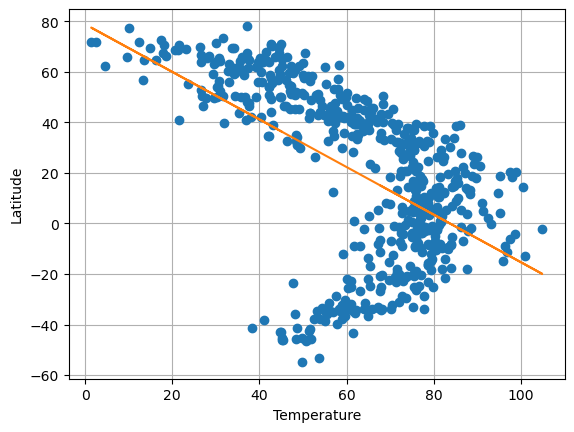

In [29]:
# A series of scatter plots to showcase
# Temperature (F) vs. Latitude

#obtain m (slope) and b(intercept) of linear regression line
m = np.polyfit(List[0],List[1],1)
f = np.poly1d(m)
plt.plot(List[0],List[1],"o", List[0], f(List[0]))
plt.xlabel("Temperature")
plt.ylabel("Latitude")
plt.grid()

plt.show()
# At the start of the latitude, temperature was lowest, and following that increasing latitude, the temperature
# become higher, but when latitude pass 0, the more latitude is reducing, the temperature is lower again.
#







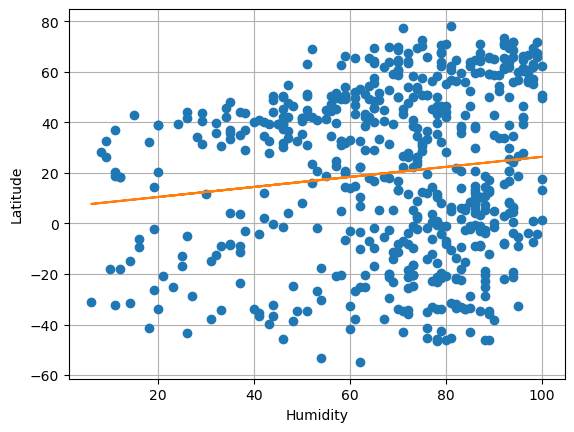

In [30]:
# Humidity (%) vs. Latitude
m = np.polyfit(List[2],List[1],1)
f = np.poly1d(m)
plt.plot(List[2],List[1],"o", List[2], f(List[2]))
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.grid()
plt.show()

# the more




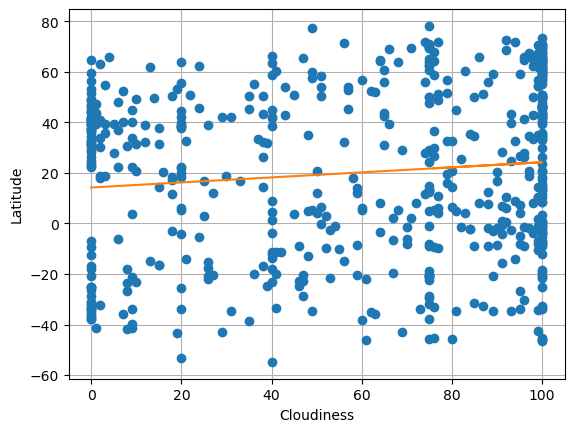

In [31]:
# Cloudiness (%) vs. Latitude
m = np.polyfit(List[3],List[1],1)
f = np.poly1d(m)
plt.plot(List[3],List[1],"o", List[3], f(List[3]))
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.grid()


plt.show()

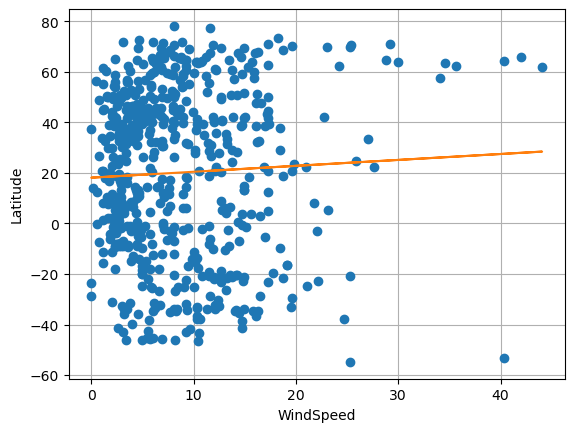

In [32]:
# WindSpeed (%) vs. Latitude
m = np.polyfit(List[4],List[1],1)
f = np.poly1d(m)
plt.plot(List[4],List[1],"o", List[4], f(List[4]))
plt.xlabel("WindSpeed")
plt.ylabel("Latitude")
plt.grid()
plt.show()

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Create a DataFrame
d = {"City_ID":List[6],"City":List[5],"City Country":List[8],"City date":List[9],"Lat":List[1],"Lng":List[7],'Max Temp': List[0],"Humidity":List[2],'Cloudiness':List[3],"Wind Speed":List[4]}
df = pd.DataFrame(data = d)
df

,City_ID,City,City Country,City date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,1,mount isa,AU,1665334419,-20.7333,139.5000,67.77,21,0,11.50
1,2,rikitea,PF,1665334419,-23.1203,-134.9692,71.46,69,10,17.29
2,3,ostrovnoy,RU,1665334419,68.0531,39.5131,41.61,79,76,16.28
3,4,vierzon,FR,1665334419,47.2101,2.0625,68.38,56,1,4.50
4,5,nhamunda,BR,1665334420,-2.1861,-56.7131,104.90,19,84,7.09
...,...,...,...,...,...,...,...,...,...,...
573,574,hami,CN,1665334566,42.8000,93.4500,54.84,15,43,3.78
574,575,parambu,BR,1665334567,-6.2111,-40.6944,97.61,16,6,11.61
575,576,hoskote,IN,1665334567,13.0669,77.7983,71.62,100,75,4.61
576,577,korla,CN,1665334568,41.7597,86.1469,59.41,26,0,3.51


In [9]:
# Convert it into Csv
df.to_csv("/Users/siyuanliang/BootCamp_University/Python-api-challenge/WeatherPy/Whether.csv")

In [10]:
# Separate the Northern and Southern Hemisphere
Northern = df[df["Lat"]>=0]
Northern
Southern = df[df["Lat"]<0]
Southern

,City_ID,City,City Country,City date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,1,mount isa,AU,1665334419,-20.7333,139.5000,67.77,21,0,11.50
1,2,rikitea,PF,1665334419,-23.1203,-134.9692,71.46,69,10,17.29
4,5,nhamunda,BR,1665334420,-2.1861,-56.7131,104.90,19,84,7.09
5,6,mataura,NZ,1665334420,-46.1927,168.8643,45.41,89,100,3.42
7,8,dunedin,NZ,1665334381,-45.8742,170.5036,48.49,78,80,5.75
...,...,...,...,...,...,...,...,...,...,...
561,562,moanda,GA,1665334564,-1.5575,13.2178,86.23,90,82,2.17
564,565,rundu,NA,1665334564,-17.9333,19.7667,81.86,12,0,5.73
568,569,gamba,GA,1665334290,-2.6500,10.0000,77.63,84,53,8.99
574,575,parambu,BR,1665334567,-6.2111,-40.6944,97.61,16,6,11.61


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [37]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(Northern['Lat'],Northern["Max Temp"])
intercept

91.83165831392662

In [39]:
y = Northern['Lat']*slope+intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_equation

'y = -0.85x + 91.83'

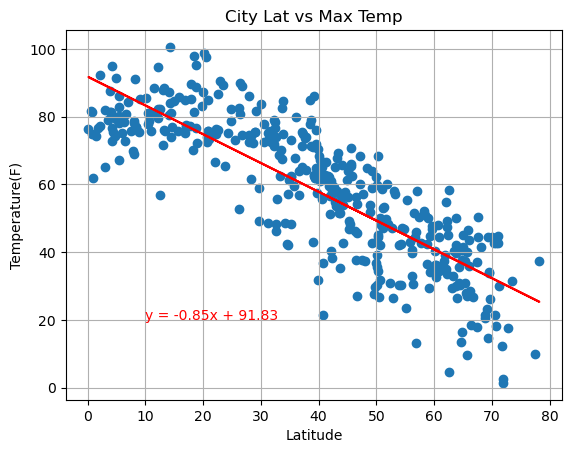

In [43]:
# Northern Hemisphere - Temperature (F) vs. Latitude
plt.scatter(Northern['Lat'],Northern["Max Temp"])
plt.plot(Northern['Lat'],y,color = 'red')
plt.grid()
plt.annotate(line_equation,(10,20),color='red')
plt.title("City Lat vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.savefig('/Users/siyuanliang/BootCamp_University/Python-api-challenge/WeatherPy/Northern City Lat vs Max Temp.png')


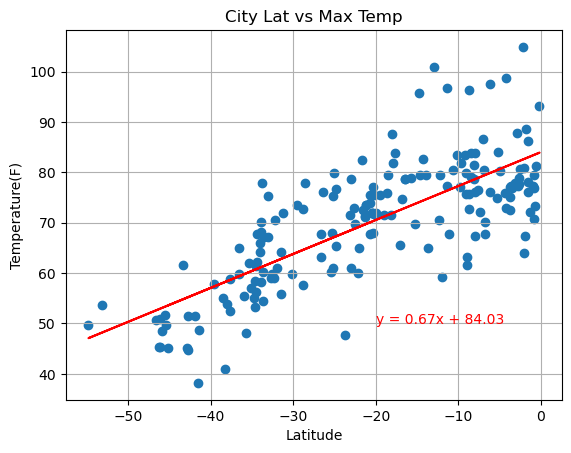

In [51]:
# Southern Hemisphere - Temperature (F) vs. Latitude
slope, intercept, rvalue, pvalue, stderr = stats.linregress(Southern['Lat'],Southern["Max Temp"])
y = Southern['Lat']*slope+intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Southern['Lat'],Southern["Max Temp"])
plt.plot(Southern['Lat'],y,color = 'red')
plt.grid()
plt.annotate(line_equation,(-20,50),color='red')
plt.title("City Lat vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.savefig('/Users/siyuanliang/BootCamp_University/Python-api-challenge/WeatherPy/Southern City Lat vs Max Temp.png')

## Latitude vs. Humidity Plot

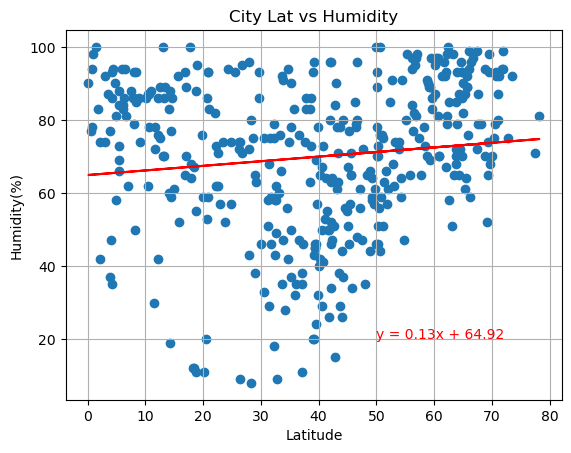

In [55]:
# Northern Hemisphere - Humidity (%) vs. Latitude
slope, intercept, rvalue, pvalue, stderr = stats.linregress(Northern['Lat'],Northern["Humidity"])
y = Northern['Lat']*slope+intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Northern['Lat'],Northern["Humidity"])
plt.plot(Northern['Lat'],y,color = 'red')
plt.grid()
plt.annotate(line_equation,(50,20),color='red')
plt.title("City Lat vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig('/Users/siyuanliang/BootCamp_University/Python-api-challenge/WeatherPy/Northern City Lat vs Humidity.png')

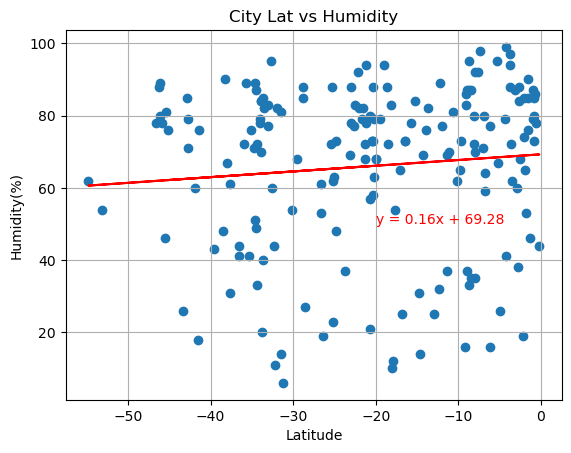

In [53]:
# Southern Hemisphere - Humidity (%) vs. Latitude
slope, intercept, rvalue, pvalue, stderr = stats.linregress(Southern['Lat'],Southern["Humidity"])
y = Southern['Lat']*slope+intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Southern['Lat'],Southern["Humidity"])
plt.plot(Southern['Lat'],y,color = 'red')
plt.grid()
plt.annotate(line_equation,(-20,50),color='red')
plt.title("City Lat vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig('/Users/siyuanliang/BootCamp_University/Python-api-challenge/WeatherPy/Northern City Lat vs Humidity.png')

## Latitude vs. Cloudiness Plot

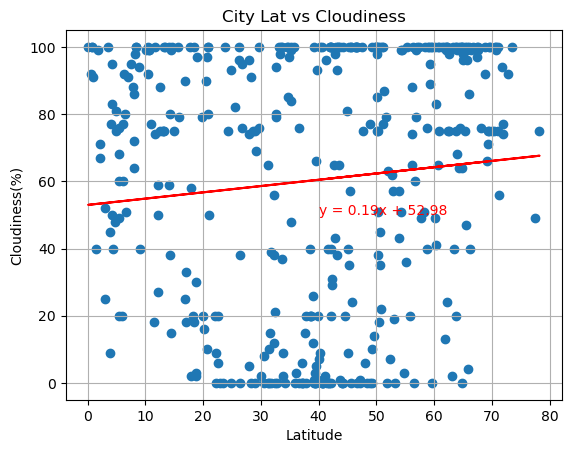

In [60]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude
slope, intercept, rvalue, pvalue, stderr = stats.linregress(Northern['Lat'],Northern["Cloudiness"])
y = Northern['Lat']*slope+intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Northern['Lat'],Northern["Cloudiness"])
plt.plot(Northern['Lat'],y,color = 'red')
plt.grid()
plt.annotate(line_equation,(40,50),color='red')
plt.title("City Lat vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.savefig('/Users/siyuanliang/BootCamp_University/Python-api-challenge/WeatherPy/Northern City Lat vs Cloudiness.png')

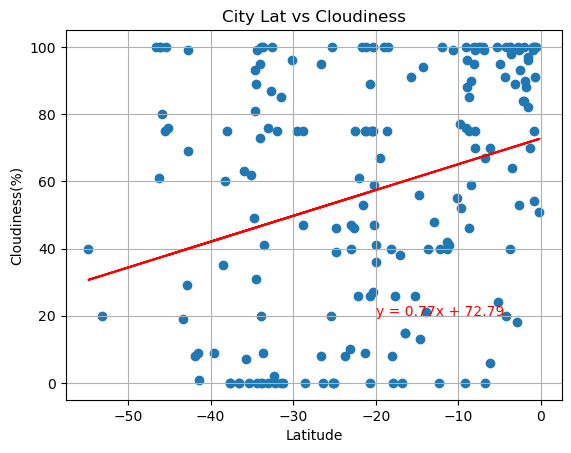

In [61]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude
slope, intercept, rvalue, pvalue, stderr = stats.linregress(Southern['Lat'],Southern["Cloudiness"])
y = Southern['Lat']*slope+intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Southern['Lat'],Southern["Cloudiness"])
plt.plot(Southern['Lat'],y,color = 'red')
plt.grid()
plt.annotate(line_equation,(-20,20),color='red')
plt.title("City Lat vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.savefig('/Users/siyuanliang/BootCamp_University/Python-api-challenge/WeatherPy/Northern City Lat vs Cloudiness.png')

## Latitude vs. Wind Speed Plot

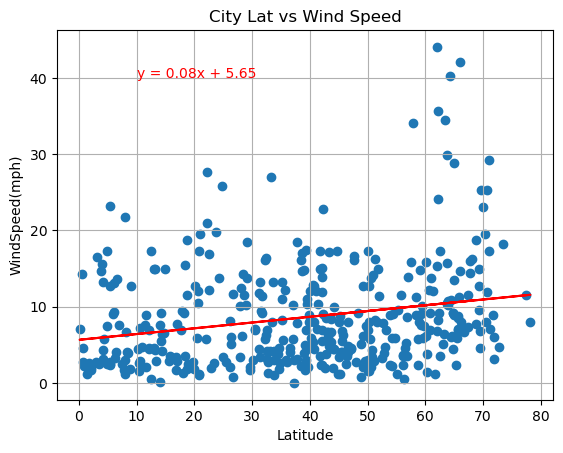

In [65]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
slope, intercept, rvalue, pvalue, stderr = stats.linregress(Northern['Lat'],Northern["Wind Speed"])
y = Northern['Lat']*slope+intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Northern['Lat'],Northern["Wind Speed"])
plt.plot(Northern['Lat'],y,color = 'red')
plt.grid()
plt.annotate(line_equation,(10,40),color='red')
plt.title("City Lat vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("WindSpeed(mph)")
plt.savefig('/Users/siyuanliang/BootCamp_University/Python-api-challenge/WeatherPy/Northern City Lat vs Cloudiness.png')

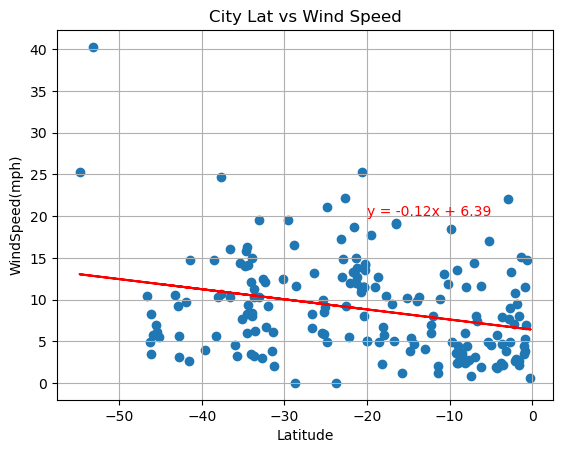

In [63]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude
slope, intercept, rvalue, pvalue, stderr = stats.linregress(Southern['Lat'],Southern["Wind Speed"])
y = Southern['Lat']*slope+intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Southern['Lat'],Southern["Wind Speed"])
plt.plot(Southern['Lat'],y,color = 'red')
plt.grid()
plt.annotate(line_equation,(-20,20),color='red')
plt.title("City Lat vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("WindSpeed(mph)")
plt.savefig('/Users/siyuanliang/BootCamp_University/Python-api-challenge/WeatherPy/Northern City Lat vs Cloudiness.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [19]:
linregress(Northern['Lat'],Northern["Max Temp"])

LinregressResult(slope=-0.8503173203242601, intercept=91.83165831392662, rvalue=-0.8349732836801249, pvalue=5.432195764297719e-104, stderr=0.028268591650327586, intercept_stderr=1.2428084890364717)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [20]:
linregress(Southern['Lat'],Southern["Max Temp"])

LinregressResult(slope=0.6742509946758208, intercept=84.02664835289583, rvalue=0.7572928577408548, pvalue=2.5110530094715495e-35, stderr=0.04321970495663107, intercept_stderr=1.0690728480155467)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [21]:
linregress(Northern['Lat'],Northern["Humidity"])

LinregressResult(slope=0.12613912661417, intercept=64.91889214875316, rvalue=0.1208132312410565, pvalue=0.016291835772495607, stderr=0.05228128348442579, intercept_stderr=2.2985093752066597)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [22]:
linregress(Southern['Lat'],Southern["Humidity"])

LinregressResult(slope=0.15792649350286103, intercept=69.27509689800688, rvalue=0.09610496508286911, pvalue=0.19560559241357534, stderr=0.12157798826854084, intercept_stderr=3.0073256239179367)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [23]:
linregress(Northern['Lat'],Northern["Cloudiness"])

LinregressResult(slope=0.18710015754294193, intercept=52.980860728940335, rvalue=0.09947064783071569, pvalue=0.04820273242673333, stderr=0.09441123699279257, intercept_stderr=4.150722761376655)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [24]:
linregress(Southern['Lat'],Southern["Cloudiness"])

LinregressResult(slope=0.7685817323323226, intercept=72.79102527384026, rvalue=0.29350304663055277, pvalue=5.520988115319764e-05, stderr=0.18607028870586587, intercept_stderr=4.602592583116071)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [25]:
linregress(Northern['Lat'],Northern["Wind Speed"])

LinregressResult(slope=0.07548125343745446, intercept=5.651301425455594, rvalue=0.2218222619358329, pvalue=8.578206262316112e-06, stderr=0.01673713491317778, intercept_stderr=0.7358362103619338)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [26]:
linregress(Southern['Lat'],Southern["Wind Speed"])

LinregressResult(slope=-0.12113506661353438, intercept=6.393129493733948, rvalue=-0.283185793423741, pvalue=0.00010256822957244138, stderr=0.030493495168332, intercept_stderr=0.7542802006230567)